# Задание по анализу данных

## Описание задания

Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сент 2022).


### Задача

Проанализировать его размещение с целью:  
1) Выяснить причину растущего CPA  
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)  

### Используемый стек технологий

•	Python  
•	Pandas  
•	Numpy  
•	Matplotlib, seaborn  
•	Scikit-learn   


## Описание данных

Client – название клиента  
Device – тип устройства  
Place – тип площадки  
BannerType – тип объявления  
QueryType – тип запроса  
TargetingType – тип таргетинга  
Cost - расходы рекламодателя  
Conversions – целевые визиты  


## Ожидаемый результат

- Презентация в ppt с выводами и графиками  
- Исходники с расчетами в свободном, но структурированном и читаемом формате (на ваше усмотрение - ссылки на xlsx-файл, data studio, bi и тд)  


### План

**1. Знакомство с данными**
 - загрузка
 - общая информация
 - исследовательский анализ, характер данных, специфика объектов
    
**2. Анализ роста CPA, визуализация**
    
**3. Пути решения, визуализация, вывод**

**************

## **1. Знакомство с данными**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

### Загрузка данных

In [2]:
df = pd.read_excel('//content/data.xlsx')

### Общая информация

Размер таблицы

In [3]:
df.shape

(10478, 12)

Имеем 12 признаков у 10478 объектов

In [4]:
df.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.84,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.64,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.75,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.00,0


### Исследовательский анализ данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

Таблиц содержат типы данных int, float, object, datetime.




In [6]:
df_nan = pd.DataFrame(df.isna().mean().sort_values(ascending=False), columns=['nan'])
df_nan

,nan
Client,0.00
Month,0.00
Category,0.00
Device,0.00
Place,0.00
BannerType,0.00
QueryType (search only),0.00
TargetingType,0.00
Shows,0.00
Clicks,0.00


Пропуски отсутствуют.

In [7]:
df.duplicated().mean()*100

0.0

Дубликатов в данных нет

### Распределение данных

In [8]:
df.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.84,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.64,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.75,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.00,0


In [9]:
df.Client.value_counts()

Client
Псилон    2186
Сигма     1560
Гамма     1446
Зета      1371
Бета      1141
Омега      927
Альфа      894
Дельта     373
Лямбда     350
Мета       230
Name: count, dtype: int64

Имеем 10 клиентов

In [10]:
df.Category.value_counts()

Category
ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ      2595
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ    1885
КРЕДИТНЫЕ КАРТЫ                   1805
ДЕБЕТОВЫЕ КАРТЫ                   1358
ВКЛАДЫ                            1223
ИПОТЕЧНОЕ КРЕДИТОВАНИЕ            1174
ИНВЕСТИЦИИ                         438
Name: count, dtype: int64

7 категорий обслуживания

In [11]:
df.Device.value_counts()

Device
Desktop    5362
Mobile     5116
Name: count, dtype: int64

Клиенты пользуются 2мя видами устройств
- стационарный компьютер
- мобильное устройство (смартфон, планшет)

In [12]:
df.BannerType.value_counts()

BannerType
text           6884
mcbanner       1407
image_ad       1394
cpm_banner      726
cpc_video        60
performance       6
dynamic           1
Name: count, dtype: int64

7 путей получений информации.

In [13]:
df.TargetingType.value_counts()

TargetingType
Phrase           7960
Retargeting      2214
Autotargeting     304
Name: count, dtype: int64

Посмотрим показатили статистики для числовых данных.

In [14]:
df.describe()

,Month,Shows,Clicks,Cost,Conversions
count,10478,10478.00,10478.00,10478.00,10478.00
mean,2021-12-23 01:32:37.701851648,1715048.61,9769.44,359829.32,507.98
min,2021-04-01 00:00:00,0.00,0.00,0.00,0.00
25%,2021-08-01 00:00:00,1.00,0.00,0.00,0.00
50%,2022-01-01 00:00:00,11811.50,280.50,13046.77,2.00
75%,2022-05-01 00:00:00,132642.50,5130.25,211153.43,94.00
max,2022-09-01 00:00:00,583150600.00,2237376.00,39766179.12,47259.00
std,NaN,15449238.73,44548.19,1211802.19,2086.40


Период времени - с 01.09.2021 по 01.09.2022 - 1 год

Признаки Shows, Clicks, Cost аномалий не демонстрируют

Целевой показатель Conversions имеет среднее значение 507,98 при медиане 2, это говорит о выбросах в распределении значений.

Text(0.5, 0.98, 'Распределение количества целевых действий')

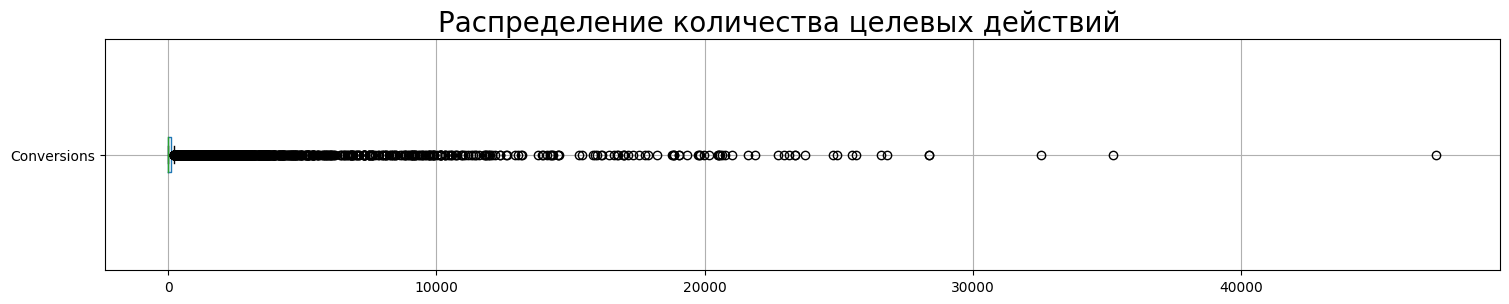

In [15]:
df.boxplot(column=['Conversions'], figsize=(18, 3), vert=False)
plt.suptitle('Распределение количества целевых действий', size = 20)

array([[<Axes: title={'center': 'Conversions'}>]], dtype=object)

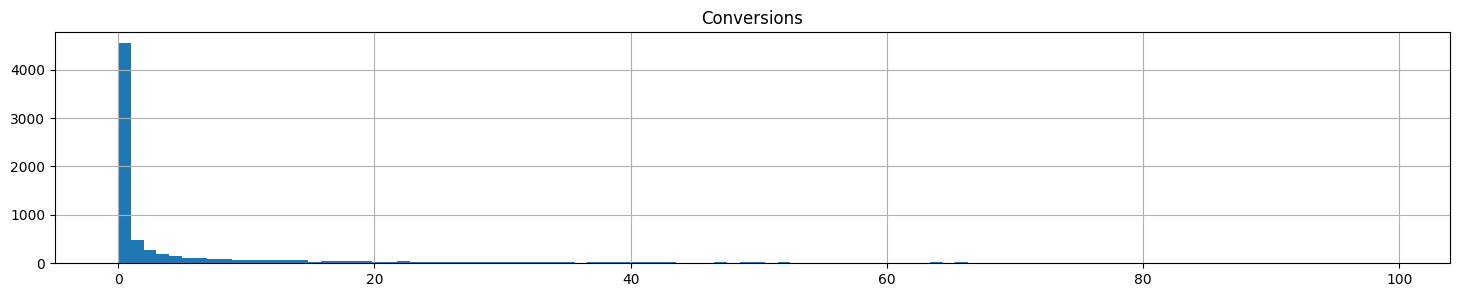

In [16]:
df[df['Conversions']<100].hist(bins = 100, column=['Conversions'], figsize=(18, 3))

## **2. Анализ роста CPA, визуализация**

Добавим в данные признак CPA, который расчитывается по формуле

**CPA = Cost(расходы на рекламу) / Conversions(количество целевых визитов)**

In [17]:
df.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.84,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.64,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.75,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.00,0


In [18]:
df['cpa']  = df['Cost'] / df['Conversions']

In [19]:
df.head()

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions,cpa
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0,NaN
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.84,0,inf
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.64,0,inf
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.75,0,inf
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.00,0,NaN


In [20]:
df.cpa.value_counts()

cpa
inf        1696
0.00        323
8201.71       1
169.95        1
746.92        1
           ... 
337.62        1
1573.70       1
524.64        1
454.33        1
1459.03       1
Name: count, Length: 5611, dtype: int64

В новой ячейке cpa (Cost per Action, цена за действие) имеем типы данных ibf и NaN заменим их на 0

In [21]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
df = df.fillna(0)

In [23]:
df.isna().mean()

Client                    0.00
Month                     0.00
Category                  0.00
Device                    0.00
Place                     0.00
BannerType                0.00
QueryType (search only)   0.00
TargetingType             0.00
Shows                     0.00
Clicks                    0.00
Cost                      0.00
Conversions               0.00
cpa                       0.00
dtype: float64

В значениях получили пропуски данных типа NaN там, где Cost равна 0 в количестве 27% - заменим такие пропуски на 0.

In [24]:
df = df.fillna(0)

In [25]:
df.describe()

,Month,Shows,Clicks,Cost,Conversions,cpa
count,10478,10478.00,10478.00,10478.00,10478.00,10478.00
mean,2021-12-23 01:32:37.701851648,1715048.61,9769.44,359829.32,507.98,5256.54
min,2021-04-01 00:00:00,0.00,0.00,0.00,0.00,0.00
25%,2021-08-01 00:00:00,1.00,0.00,0.00,0.00,0.00
50%,2022-01-01 00:00:00,11811.50,280.50,13046.77,2.00,155.79
75%,2022-05-01 00:00:00,132642.50,5130.25,211153.43,94.00,1317.73
max,2022-09-01 00:00:00,583150600.00,2237376.00,39766179.12,47259.00,2227386.43
std,NaN,15449238.73,44548.19,1211802.19,2086.40,41369.44


<Axes: xlabel='Month', ylabel='cpa'>

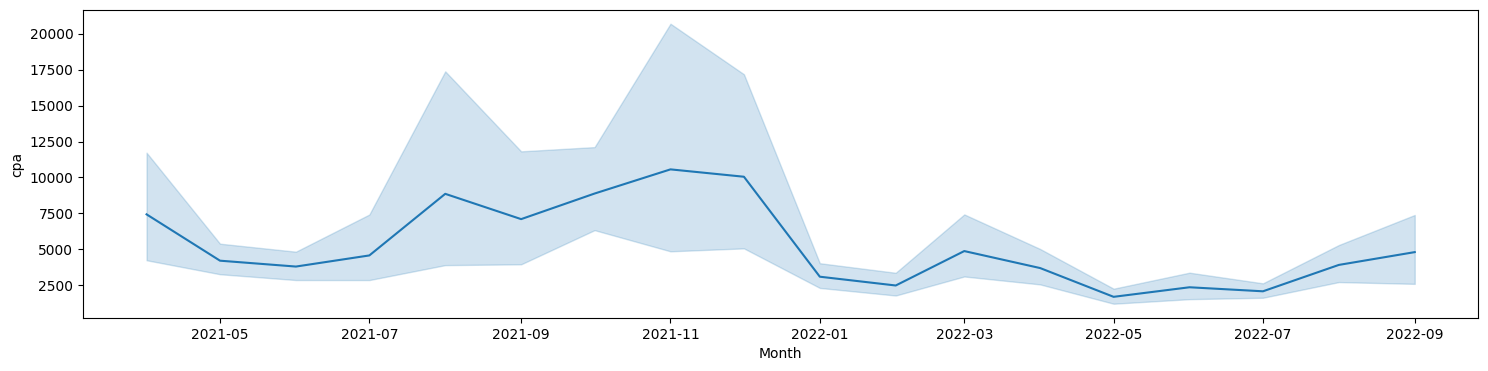

In [26]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.lineplot(data=df, x='Month', y='cpa', ax=ax)

In [27]:
df.head(2)

,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions,cpa
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.00,0,0.00
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.84,0,0.00


Посмотрим как на cpa влияют числовыехарактеристики.

In [39]:
sns.lineplot(data=df, x='Month', y='Shows', ax=ax)

<Axes: xlabel='Month', ylabel='cpa'>

In [40]:
sns.lineplot(data=df, x='Month', y='Clicks', ax=ax)

<Axes: xlabel='Month', ylabel='cpa'>

Поведение признаков Client, BannerType, TargetingType демонстрирует прямое их влияние на показатель CPA

Посмотрим на кореляцию этих признаков

In [42]:
display(df[['Shows', 'Clicks', 'cpa']].corr().style.background_gradient(cmap='summer'))

,Shows,Clicks,cpa
Shows,1.000000,0.563395,0.020240
Clicks,0.563395,1.000000,0.059223
cpa,0.020240,0.059223,1.000000


## Описание задания

Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сент 2022).


### Задача

Проанализировать его размещение с целью:  
1) Выяснить причину растущего CPA  
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)  

## Вывод

Для прогнозирования статуса репетитора добросовестный он или нет разработаны модели, которые по имеющейся информации о репетиторе и проведенных им занятий классифицирует репетиторов.  
Оценка качества модели проведена по метрике F1.

Применен стек технологий:

•	Python    
•	Pandas  
•	Numpy  
•	Matplotlib, seaborn  
•	Scikit-learn  
•	DecisionTreeClassifier  
•	GradientBoostingClassifier  
•	XGBClassifier  
•	RandomForestClassifier  

Обучены 5 моделей:  
-	XGBClassifier - перобучение
-	GradientBoostingClassifier - перобучение
-	DecisionTreeClassifier - возможно перобучение, как вариант,можно использовать в качестве составляющней ансамблиевого метода.
- LogisticRegression - перспективная модель, низкий показатель качества f1 = 0.573
-	RandomForestClassifier - самая перспективная модель f1 = 0.803, возможные пути улучшение критерия качества:
    1. генерация новых признаков, основанных не на абсолютных значениях, а на отношении и долях - более стойкая модель на перспективу.
    2. оптимизация гиперпараметров
    3. удаление признаков на основании анализа Feature importance